In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.drop(df.columns[0],axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
def get_uniques(df,columns):
    return {column:list(df[column].unique()) for column in columns}

In [8]:
categorical_columns=['region','Date','type']
get_uniques(df,categorical_columns)

{'region': ['Albany',
  'Atlanta',
  'BaltimoreWashington',
  'Boise',
  'Boston',
  'BuffaloRochester',
  'California',
  'Charlotte',
  'Chicago',
  'CincinnatiDayton',
  'Columbus',
  'DallasFtWorth',
  'Denver',
  'Detroit',
  'GrandRapids',
  'GreatLakes',
  'HarrisburgScranton',
  'HartfordSpringfield',
  'Houston',
  'Indianapolis',
  'Jacksonville',
  'LasVegas',
  'LosAngeles',
  'Louisville',
  'MiamiFtLauderdale',
  'Midsouth',
  'Nashville',
  'NewOrleansMobile',
  'NewYork',
  'Northeast',
  'NorthernNewEngland',
  'Orlando',
  'Philadelphia',
  'PhoenixTucson',
  'Pittsburgh',
  'Plains',
  'Portland',
  'RaleighGreensboro',
  'RichmondNorfolk',
  'Roanoke',
  'Sacramento',
  'SanDiego',
  'SanFrancisco',
  'Seattle',
  'SouthCarolina',
  'SouthCentral',
  'Southeast',
  'Spokane',
  'StLouis',
  'Syracuse',
  'Tampa',
  'TotalUS',
  'West',
  'WestTexNewMexico'],
 'Date': ['2015-12-27',
  '2015-12-20',
  '2015-12-13',
  '2015-12-06',
  '2015-11-29',
  '2015-11-22',
  '20

In [9]:
date_ordering=sorted(df['Date'].unique())

In [10]:
ordinal_feature=['Date']
nominal_feature=['region']
target_column='type'

In [11]:
date_ordering.index('2018-01-07')

157

In [12]:
def ordinal_encode(df,column,date_ordering):
    df=df.copy()
    df[column]=df[column].apply(lambda x:date_ordering.index(x))
    return df

def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [13]:
df=ordinal_encode(df,'Date',date_ordering)

In [14]:
df=onehot_encode(df,'region')

In [15]:
for column in df.columns:
    if df[column].dtype=='bool':
        df[column]=df[column].astype(float)

In [16]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
label_encoder=LabelEncoder()
df['type']=label_encoder.fit_transform(df['type'])

In [18]:
df['type']

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        18249 non-null  int64  
 1   AveragePrice                18249 non-null  float64
 2   Total Volume                18249 non-null  float64
 3   4046                        18249 non-null  float64
 4   4225                        18249 non-null  float64
 5   4770                        18249 non-null  float64
 6   Total Bags                  18249 non-null  float64
 7   Small Bags                  18249 non-null  float64
 8   Large Bags                  18249 non-null  float64
 9   XLarge Bags                 18249 non-null  float64
 10  type                        18249 non-null  int32  
 11  year                        18249 non-null  int64  
 12  region_Albany               18249 non-null  float64
 13  region_Atlanta              182

In [20]:
y=df['type']
x=df.drop('type',axis=1)

In [21]:
x.shape

(18249, 65)

In [22]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12774, 65)
(5475, 65)
(12774,)
(5475,)


In [25]:
x_train
x_test
y_train
y_test

5078     0
10697    1
15569    1
2001     0
15780    1
        ..
9571     1
13448    1
17719    1
10243    1
15175    1
Name: type, Length: 5475, dtype: int32

In [26]:
x_train.shape

(12774, 65)

In [27]:
inputs=tf.keras.Input(shape=(65,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

batch_size=64
epochs=50

history=model.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,epochs=epochs,
                 callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],verbose=2)

Epoch 1/50
160/160 - 9s - 57ms/step - accuracy: 0.8147 - loss: 0.1363 - val_accuracy: 0.9119 - val_loss: 0.0744 - learning_rate: 0.0010
Epoch 2/50
160/160 - 1s - 4ms/step - accuracy: 0.9216 - loss: 0.0625 - val_accuracy: 0.9245 - val_loss: 0.0569 - learning_rate: 0.0010
Epoch 3/50
160/160 - 1s - 4ms/step - accuracy: 0.9457 - loss: 0.0444 - val_accuracy: 0.9558 - val_loss: 0.0372 - learning_rate: 0.0010
Epoch 4/50
160/160 - 1s - 5ms/step - accuracy: 0.9667 - loss: 0.0298 - val_accuracy: 0.9628 - val_loss: 0.0319 - learning_rate: 0.0010
Epoch 5/50
160/160 - 1s - 4ms/step - accuracy: 0.9773 - loss: 0.0214 - val_accuracy: 0.9753 - val_loss: 0.0226 - learning_rate: 0.0010
Epoch 6/50
160/160 - 1s - 4ms/step - accuracy: 0.9842 - loss: 0.0154 - val_accuracy: 0.9843 - val_loss: 0.0154 - learning_rate: 0.0010
Epoch 7/50
160/160 - 1s - 4ms/step - accuracy: 0.9894 - loss: 0.0114 - val_accuracy: 0.9871 - val_loss: 0.0122 - learning_rate: 0.0010
Epoch 8/50
160/160 - 1s - 6ms/step - accuracy: 0.9906 

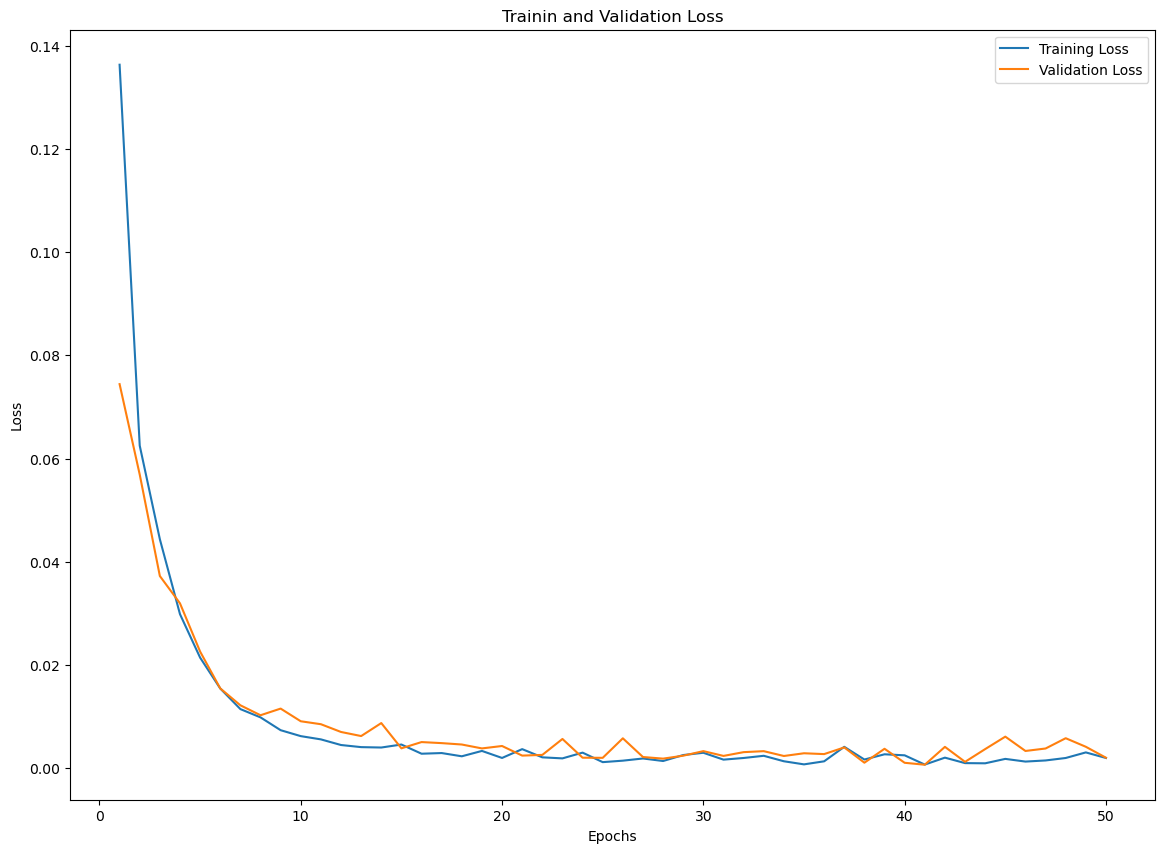

In [28]:
plt.figure(figsize=(14,10))
epochs_range=range(1,epochs+1)
train_loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs_range,train_loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')

plt.title('Trainin and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('avocado1.png')
plt.show()

In [29]:
model.evaluate(x_test,y_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0017


[0.0015479120193049312, 0.9979908466339111]

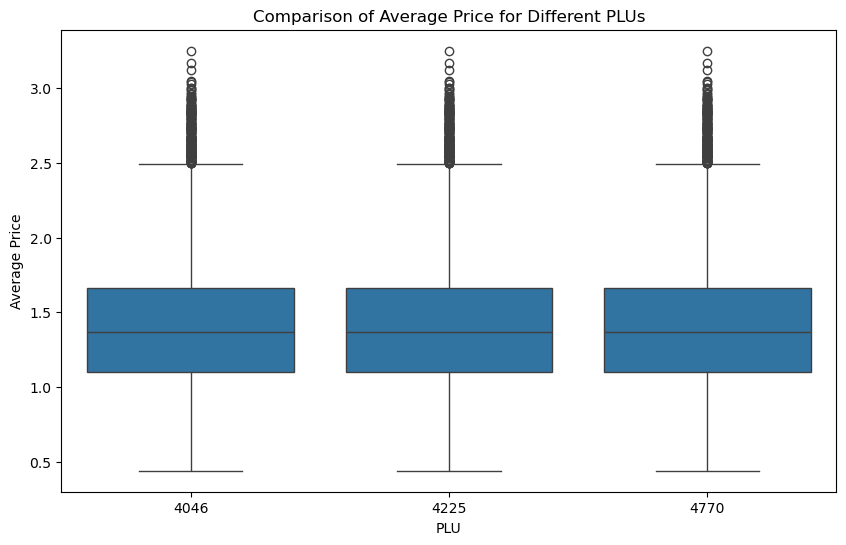

ANOVA Results: F-statistic = nan, P-value = nan


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load data (replace with your actual data path)
df = pd.read_csv('avocado.csv')

# Reshape the data for easier comparison
df_melted = df.melt(id_vars=['AveragePrice'], value_vars=['4046', '4225', '4770'], 
                    var_name='PLU', value_name='PLU_value')

# Visualization: Boxplot of AveragePrice for each PLU
plt.figure(figsize=(10, 6))
sns.boxplot(x='PLU', y='AveragePrice', data=df_melted)
plt.title('Comparison of Average Price for Different PLUs')
plt.xlabel('PLU')
plt.ylabel('Average Price')
plt.show()

# Perform ANOVA to compare means across PLUs
f_statistic, p_value = stats.f_oneway(df[df['4046'] == 1]['AveragePrice'],
                                      df[df['4225'] == 1]['AveragePrice'],
                                      df[df['4770'] == 1]['AveragePrice'])

print(f"ANOVA Results: F-statistic = {f_statistic}, P-value = {p_value}")

# If ANOVA is significant, perform Tukey's HSD test
if p_value < 0.05:
    tukey_result = pairwise_tukeyhsd(df_melted['AveragePrice'], df_melted['PLU'])
    print(tukey_result)


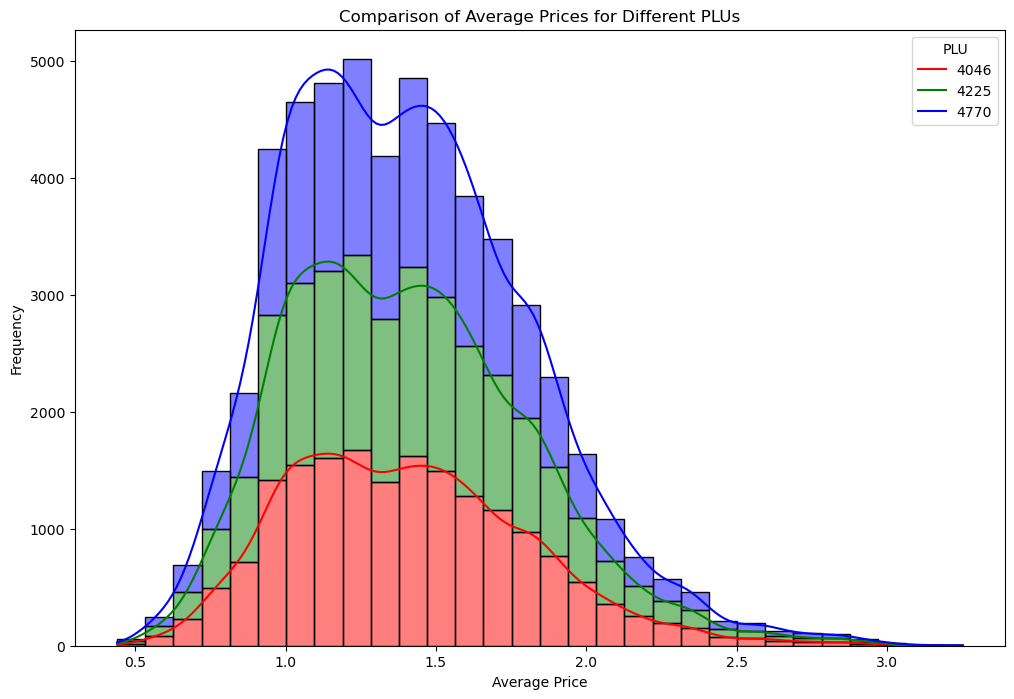

In [31]:
df_plu = df[['AveragePrice', '4046', '4225', '4770']]
# Melt the DataFrame to make it easier to plot for each PLU
df_melted = df_plu.melt(id_vars=['AveragePrice'], value_vars=['4046', '4225', '4770'], 
                        var_name='PLU', value_name='PLU_value')
# Set up the figure for histograms
plt.figure(figsize=(12, 8))
# Create a color palette for PLUs
palette = {'4046': 'blue', '4225': 'green', '4770': 'red'}
# Create a histogram for each PLU with different colors
sns.histplot(data=df_melted, x='AveragePrice', hue='PLU', multiple="stack", kde=True, 
             bins=30, palette=palette)
# Customize the plot
plt.title('Comparison of Average Prices for Different PLUs')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
# custom legend
plt.legend(title='PLU', labels=['4046', '4225', '4770'], loc='upper right')
plt.show()



--- ANOVA Test ---
F-statistic: 243.6990
P-value: 4.8573e-106
Conclusion: The means of AveragePrice across different PLU codes are significantly different (p < 0.05).

--- Tukey's HSD Test ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  4046   4225      0.0   1.0 -0.0099 0.0099  False
  4046   4770      0.0   1.0 -0.0099 0.0099  False
  4225   4770      0.0   1.0 -0.0099 0.0099  False
--------------------------------------------------


<Figure size 1000x600 with 0 Axes>

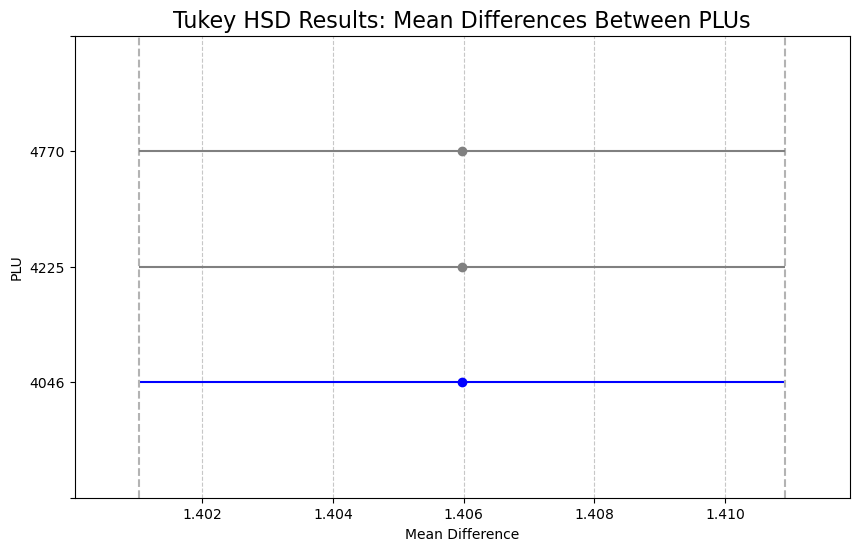

In [36]:
print("\n--- ANOVA Test ---")
anova_results = stats.f_oneway(
    df[df['4046'] > 0]['AveragePrice'],
    df[df['4225'] > 0]['AveragePrice'],
    df[df['4770'] > 0]['AveragePrice']
)

# Print the ANOVA results
print(f"F-statistic: {anova_results.statistic:.4f}")
print(f"P-value: {anova_results.pvalue:.4e}")

# Interpret the ANOVA results
if anova_results.pvalue < 0.05:
    print("Conclusion: The means of AveragePrice across different PLU codes are significantly different (p < 0.05).")
else:
    print("Conclusion: No significant difference in the means of AveragePrice across different PLU codes (p >= 0.05).")

# If significant, perform Tukey's HSD test for pairwise comparisons
if anova_results.pvalue < 0.05:
    print("\n--- Tukey's HSD Test ---")
    tukey_result = pairwise_tukeyhsd(endog=df_melted['AveragePrice'], 
                                     groups=df_melted['PLU'])
    print(tukey_result)

    # Visualize Tukey's HSD results
    plt.figure(figsize=(10, 6))
    tukey_result.plot_simultaneous(comparison_name='4046', xlabel='Mean Difference', ylabel='PLU')
    plt.title('Tukey HSD Results: Mean Differences Between PLUs', fontsize=16)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()